# RDS HW3 Erin Kong

Install the Data Synthesizer library.

In [1]:
!pip install DataSynthesizer

In [2]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import DataSynthesizer.DataGenerator as dg
dg.np = np

In [3]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']

    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed, minimum=18, maximum=96)
    return generator.synthetic_dataset

In [4]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']

    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [5]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)

    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [6]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# Please follow the steps as instructed when you run the following commands.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas})
downloaded.GetContentFile(real_data_file)
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake})
downloaded.GetContentFile(fake_data_file)
df_fake = pd.read_csv(fake_data_file)

In [8]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json',
                     'B': './descrption_B.json',
                     'C': './descrption_C.json',
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [9]:
# Your code here
GT_age = np.array(df_real['age'].agg(['median', 'mean', 'min', 'max']))
GT_score = np.array(df_real['score'].agg(['median', 'mean', 'min', 'max']))
A_age = np.array(df_real_A['age'].agg(['median', 'mean', 'min', 'max']))
A_score = np.array(df_real_A['score'].agg(['median', 'mean', 'min', 'max']))
B_age = np.array(df_real_B['age'].agg(['median', 'mean', 'min', 'max']))
B_score = np.array(df_real_B['score'].agg(['median', 'mean', 'min', 'max']))
C_age = np.array(df_real_C['age'].agg(['median', 'mean', 'min', 'max']))
C_score = np.array(df_real_C['score'].agg(['median', 'mean', 'min', 'max']))
D_age = np.array(df_real_D['age'].agg(['median', 'mean', 'min', 'max']))
D_score = np.array(df_real_D['score'].agg(['median', 'mean', 'min', 'max']))

tmpdf = pd.DataFrame(columns=['Median','Mean','Min','Max'],index=['Ground Truth Age',
                                                                  'Ground Truth Score',
                                                                  'Random Mode Age',
                                                                  'Random Mode Score',
                                                                  'Independent Age',
                                                                  'Independent Score',
                                                                  'Correlated K1 Age',
                                                                  'Correlated K1 Score',
                                                                  'Correlated K2 Age',
                                                               'Correlated K2 Score'])
# tmpdf['Ground Truth Age'] = GT_age
# tmpdf['Ground Truth Score'] = GT_score
# tmpdf['Random Mode Age'] = A_age
# tmpdf['Random Mode Score'] = A_score
# tmpdf['Independent Age'] = B_age
# tmpdf['Independent Score'] = B_score
# tmpdf['Correlated K1 Age'] = C_age
# tmpdf['Correlated K1 Score'] = C_score
# tmpdf['Correlated K2 Age'] = D_age
# tmpdf['Correlated K2 Score'] = D_score

tmpdf['Median'] = [GT_age[0], GT_score[0], A_age[0], A_score[0], B_age[0], B_score[0], C_age[0], C_score[0], D_age[0], D_score[0]]
tmpdf['Mean'] = [GT_age[1], GT_score[1], A_age[1], A_score[1], B_age[1], B_score[1], C_age[1], C_score[1], D_age[1], D_score[1]]
tmpdf['Min'] = [GT_age[2], GT_score[2], A_age[2], A_score[2], B_age[2], B_score[2], C_age[2], C_score[2], D_age[2], D_score[2]]
tmpdf['Max'] = [GT_age[3], GT_score[3], A_age[3], A_score[3], B_age[3], B_score[3], C_age[3], C_score[3], D_age[3], D_score[3]]

In [10]:
tmpdf

,Median,Mean,Min,Max
Ground Truth Age,32.0,35.143319,18.0,96.0
Ground Truth Score,4.0,4.371268,-1.0,10.0
Random Mode Age,57.0,57.012300,18.0,96.0
Random Mode Score,5.0,4.945500,-1.0,10.0
Independent Age,33.0,35.735400,18.0,76.0
Independent Score,4.0,4.365700,1.0,10.0
Correlated K1 Age,36.0,41.578800,18.0,96.0
Correlated K1 Score,5.0,4.948700,-1.0,10.0
Correlated K2 Age,39.0,44.153200,18.0,96.0
Correlated K2 Score,4.0,4.466000,-1.0,10.0


Notes
- GT has the same min and max as random.
- random mode had a higher median and mean in both age and score, suggesting that it 'overestimated' or is skewed left
- The independent mode had the most similar mean and median, but had a smaller range from the ground truth's range.

### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

Text(0, 0.5, 'Frequency')

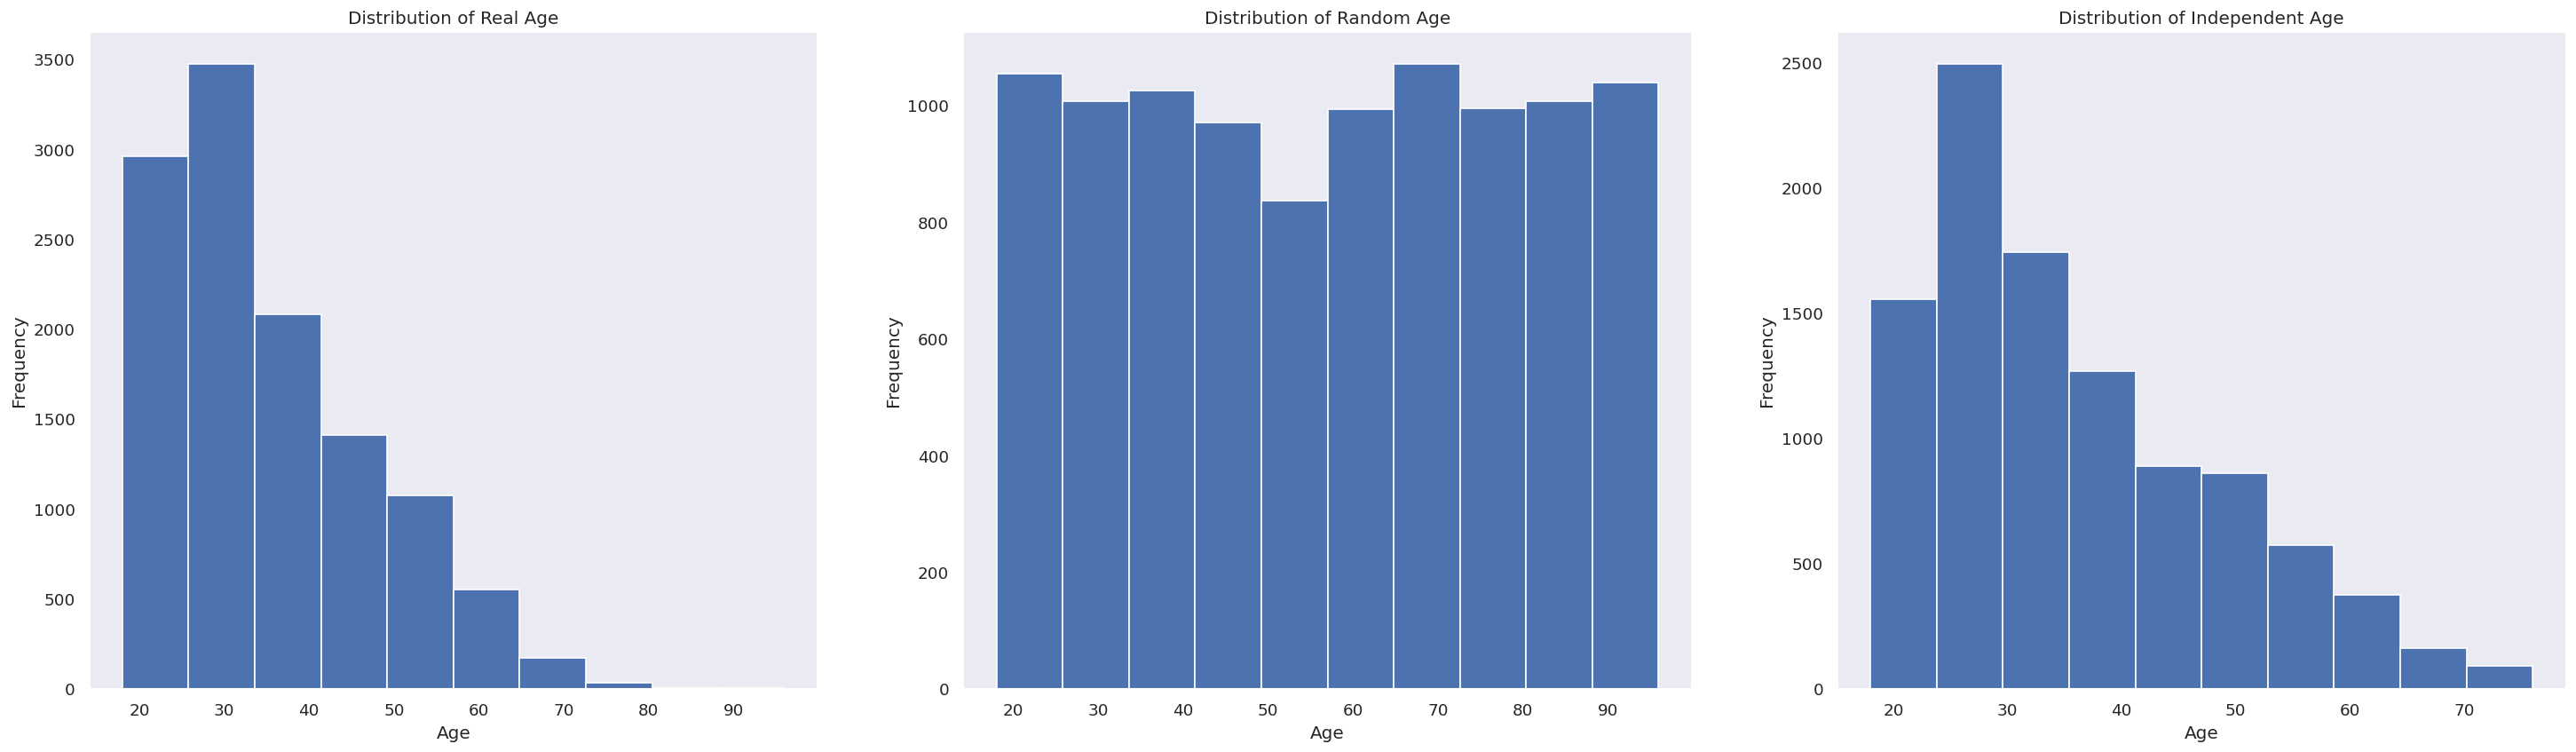

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8), dpi=120)
axes[0].hist(df_real['age'])
axes[0].set_title('Distribution of Real Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_real_A['age'])
axes[1].set_title('Distribution of Random Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

axes[2].hist(df_real_B['age'])
axes[2].set_title('Distribution of Independent Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')

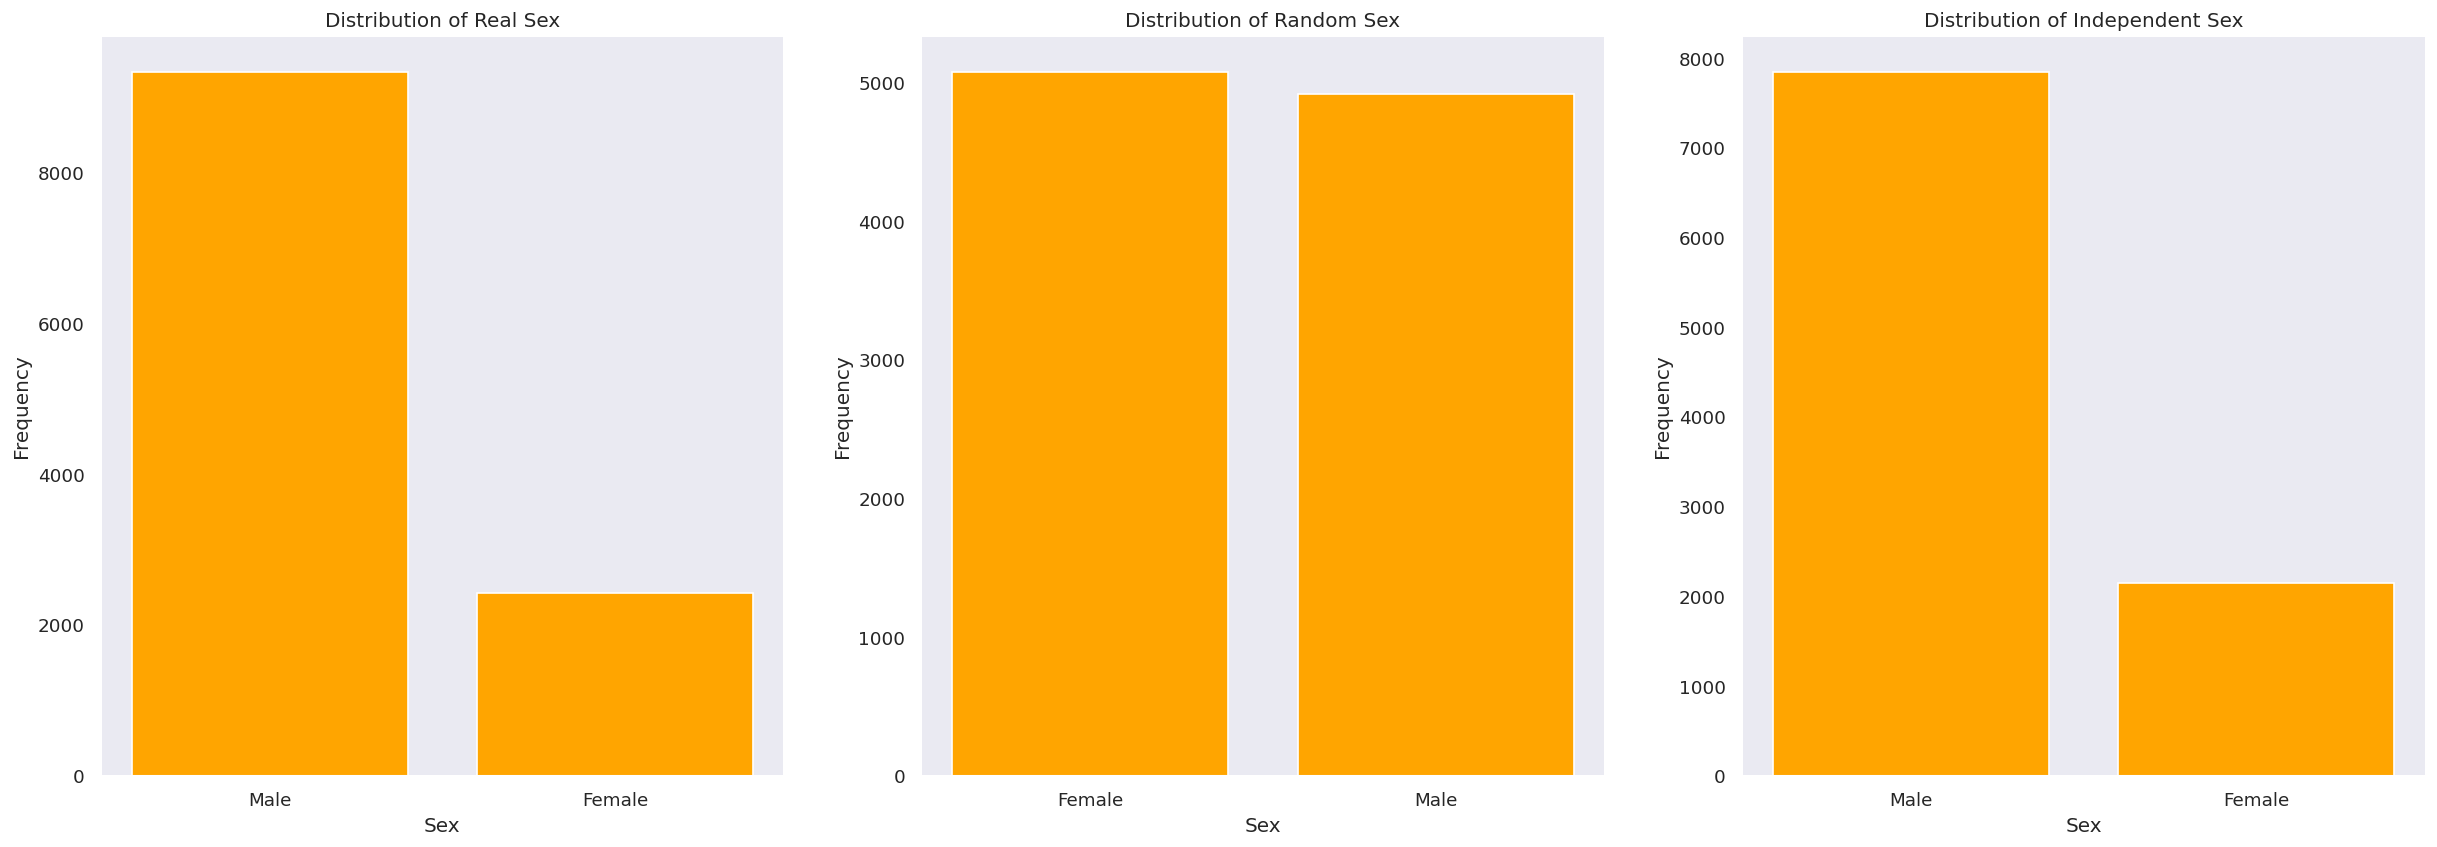

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8), dpi=120)
axes[0].bar(df_real['sex'].value_counts().index, df_real['sex'].value_counts(), color='orange')
axes[0].set_title('Distribution of Real Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Frequency')

axes[1].bar(df_real_A['sex'].value_counts().index, df_real_A['sex'].value_counts(), color='orange')
axes[1].set_title('Distribution of Random Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Frequency')

axes[2].bar(df_real_B['sex'].value_counts().index, df_real_B['sex'].value_counts(), color='orange')
axes[2].set_title('Distribution of Independent Sex')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Frequency')
plt.show();

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [13]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [14]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [15]:
# probability distributions over age (KS test)
print('KS Test - True and Random Age: ', ks_test(df_real, df_real_A, 'age'))
print('KS Test - True and Independent Age: ', ks_test(df_real, df_real_B, 'age'))

# probability distributions over sex (KL-divergence test)
print('\nKL Divergence Test - True and Random Sex: ', kl_test(df_real, df_real_A, 'sex'))
print('KL Divergence Test - True and Independent Sex: ', kl_test(df_real, df_real_B, 'sex'))


KS Test - True and Random Age:  0.4490261546312835
KS Test - True and Independent Age:  0.026252445351705345

KL Divergence Test - True and Random Sex:  0.22319792405369002
KL Divergence Test - True and Independent Sex:  0.0002494300869420041


### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

In [16]:
# Use pairwise_attributes_mutual_information function.
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
# Your code here
pairwise = pairwise_attributes_mutual_information(df_fake)
pairwise_C = pairwise_attributes_mutual_information(df_fake_C)
pairwise_D = pairwise_attributes_mutual_information(df_fake_D)

print('Pairwise of Attributes: \n', pairwise)
print('Pairwise of Attributes (K1): \n', pairwise_C)
print('Pairwise of Attributes (K2): \n', pairwise_D)

Pairwise of Attributes: 
            child_1   child_2  parent_1  parent_2
child_1   1.000000  0.211242  0.214345  0.195899
child_2   0.211242  1.000000  0.208301  0.200690
parent_1  0.214345  0.208301  1.000000  0.002421
parent_2  0.195899  0.200690  0.002421  1.000000
Pairwise of Attributes (K1): 
            child_1   child_2  parent_1  parent_2
child_1   1.000000  0.229400  0.070395  0.026739
child_2   0.229400  1.000000  0.249762  0.114695
parent_1  0.070395  0.249762  1.000000  0.028520
parent_2  0.026739  0.114695  0.028520  1.000000
Pairwise of Attributes (K2): 
            child_1   child_2  parent_1  parent_2
child_1   1.000000  0.074153  0.034209  0.221418
child_2   0.074153  1.000000  0.203135  0.110479
parent_1  0.034209  0.203135  1.000000  0.073704
parent_2  0.221418  0.110479  0.073704  1.000000


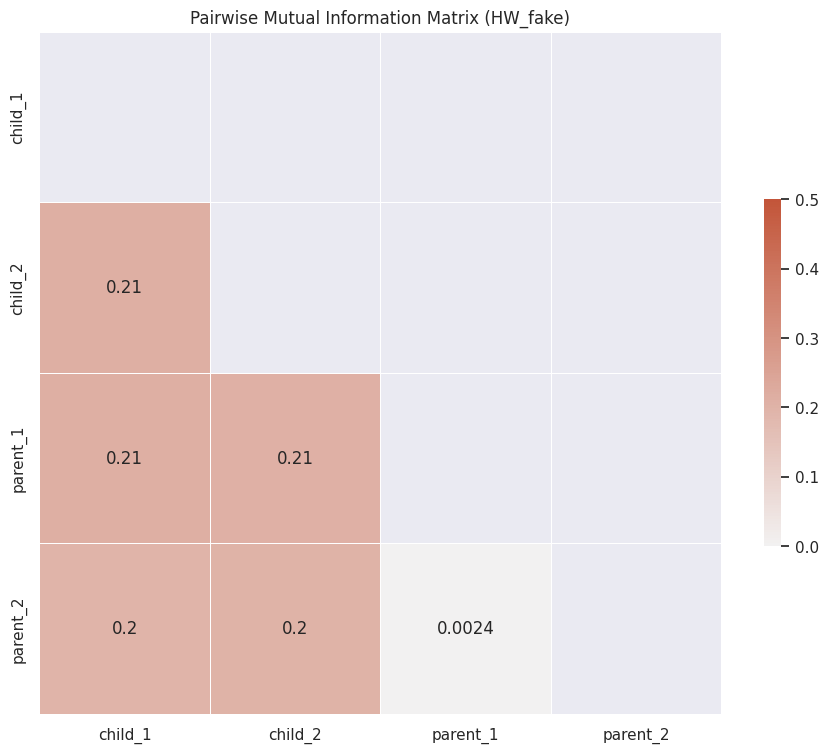

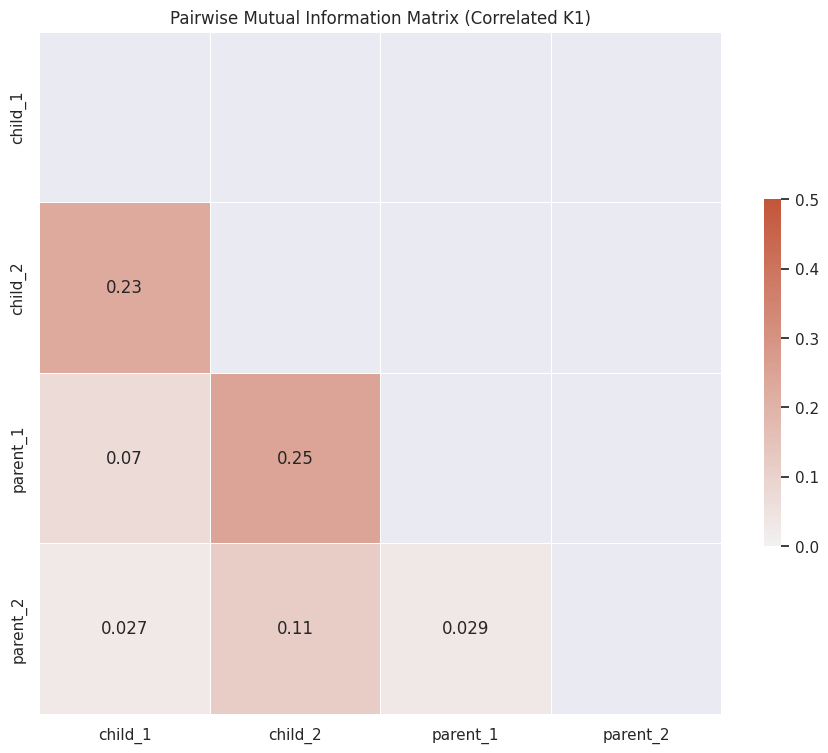

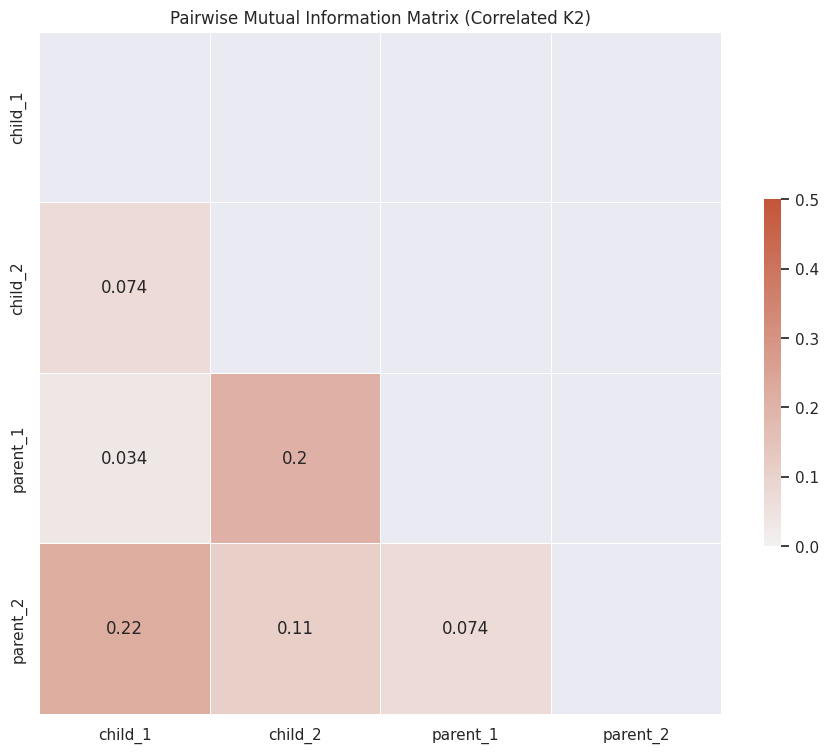

In [17]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Your code here
sns.set_theme(style="dark")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(pairwise, dtype=bool))

fig, axes = plt.subplots(figsize=(11, 9))
sns.heatmap(pairwise, mask=mask, cmap=cmap, vmin=0, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);
axes.set_title('Pairwise Mutual Information Matrix (HW_fake)');


mask_C = np.triu(np.ones_like(pairwise_C, dtype=bool))
fig, axes = plt.subplots(figsize=(11, 9))
sns.heatmap(pairwise_C, mask=mask_C, cmap=cmap, vmin=0, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);
axes.set_title('Pairwise Mutual Information Matrix (Correlated K1)');


mask_D = np.triu(np.ones_like(pairwise_D, dtype=bool))
fig, axes = plt.subplots(figsize=(11, 9))
sns.heatmap(pairwise_D, mask=mask_D, cmap=cmap, vmin=0, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
axes.set_title('Pairwise Mutual Information Matrix (Correlated K2)');


## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [63]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Your code here
output_data_size = 10000

description_files = {'A':'description(random).json',
                     'B':'description(independent).json',
                     'C':'description(correlated k1).json'}
synthetic_data_files = {'A':'synthetic data(random).csv',
                        'B':'synthetic data(independent).csv',
                        'C':'synthetic data(correlated k1).csv'}


describer = DataDescriber()
generator = DataGenerator()

In [79]:
agg_A = []
agg_B = []
agg_C = []
np.random.seed(seed)
set_random_seed(seed)

for i in range(10):

  # random mode [A]
  describer.describe_dataset_in_random_mode(real_data_file)
  describer.save_dataset_description_to_file(description_files['A'])
  generator.generate_dataset_in_random_mode(n=output_data_size,
                                          description_file=description_files['A'],
                                          seed=seed+i,
                                            minimum=18,
                                            maximum=96)
  generator.save_synthetic_data(synthetic_data_files['A'])
  tmpdf_fake_A = pd.read_csv(synthetic_data_files['A'])
  A = np.array(tmpdf_fake_A['age'].agg(['median', 'mean', 'min', 'max']))
  agg_A.append(A)

  # independent attribute [B]
  describer.describe_dataset_in_independent_attribute_mode(real_data_file,
                                                           epsilon=0.1)
  describer.save_dataset_description_to_file(description_files['B'])
  generator.generate_dataset_in_independent_mode(n=output_data_size,
                                                description_file=description_files['B'],
                                                seed=seed+i)
  generator.save_synthetic_data(synthetic_data_files['B'])
  tmpdf_fake_B = pd.read_csv(synthetic_data_files['B'])
  B = np.array(tmpdf_fake_B['age'].agg(['median', 'mean', 'min', 'max']))
  agg_B.append(B)
  # correlated attribute k1 [C]
  describer.describe_dataset_in_correlated_attribute_mode(real_data_file,
                                                          epsilon=0.1,
                                                          k=1)
  describer.save_dataset_description_to_file(description_files['C'])
  generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size,
                                                         description_file=description_files['C'],
                                                         seed=seed+i)
  generator.save_synthetic_data(synthetic_data_files['C'])
  tmpdf_fake_C = pd.read_csv(synthetic_data_files['C'])
  C = np.array(tmpdf_fake_C['age'].agg(['median', 'mean', 'min', 'max']))
  agg_C.append(C)

  clear_output()

In [218]:
agg_A_df = pd.DataFrame(agg_A, columns=['median','mean','min','max'])
agg_B_df = pd.DataFrame(agg_B, columns=['median','mean','min','max'])
agg_C_df = pd.DataFrame(agg_C, columns=['median','mean','min','max'])

agg_A_df['mode'] = 'random'
agg_B_df['mode'] = 'independent'
agg_C_df['mode'] = 'correlated k1'

agg_df = pd.concat([agg_A_df, agg_B_df, agg_C_df], ignore_index=True)
agg_df.head()

,median,mean,min,max,mode
0,57.0,57.2207,18.0,96.0,random
1,57.0,57.0015,18.0,96.0,random
2,58.0,57.4411,18.0,96.0,random
3,57.0,57.1868,18.0,96.0,random
4,57.0,56.9032,18.0,96.0,random


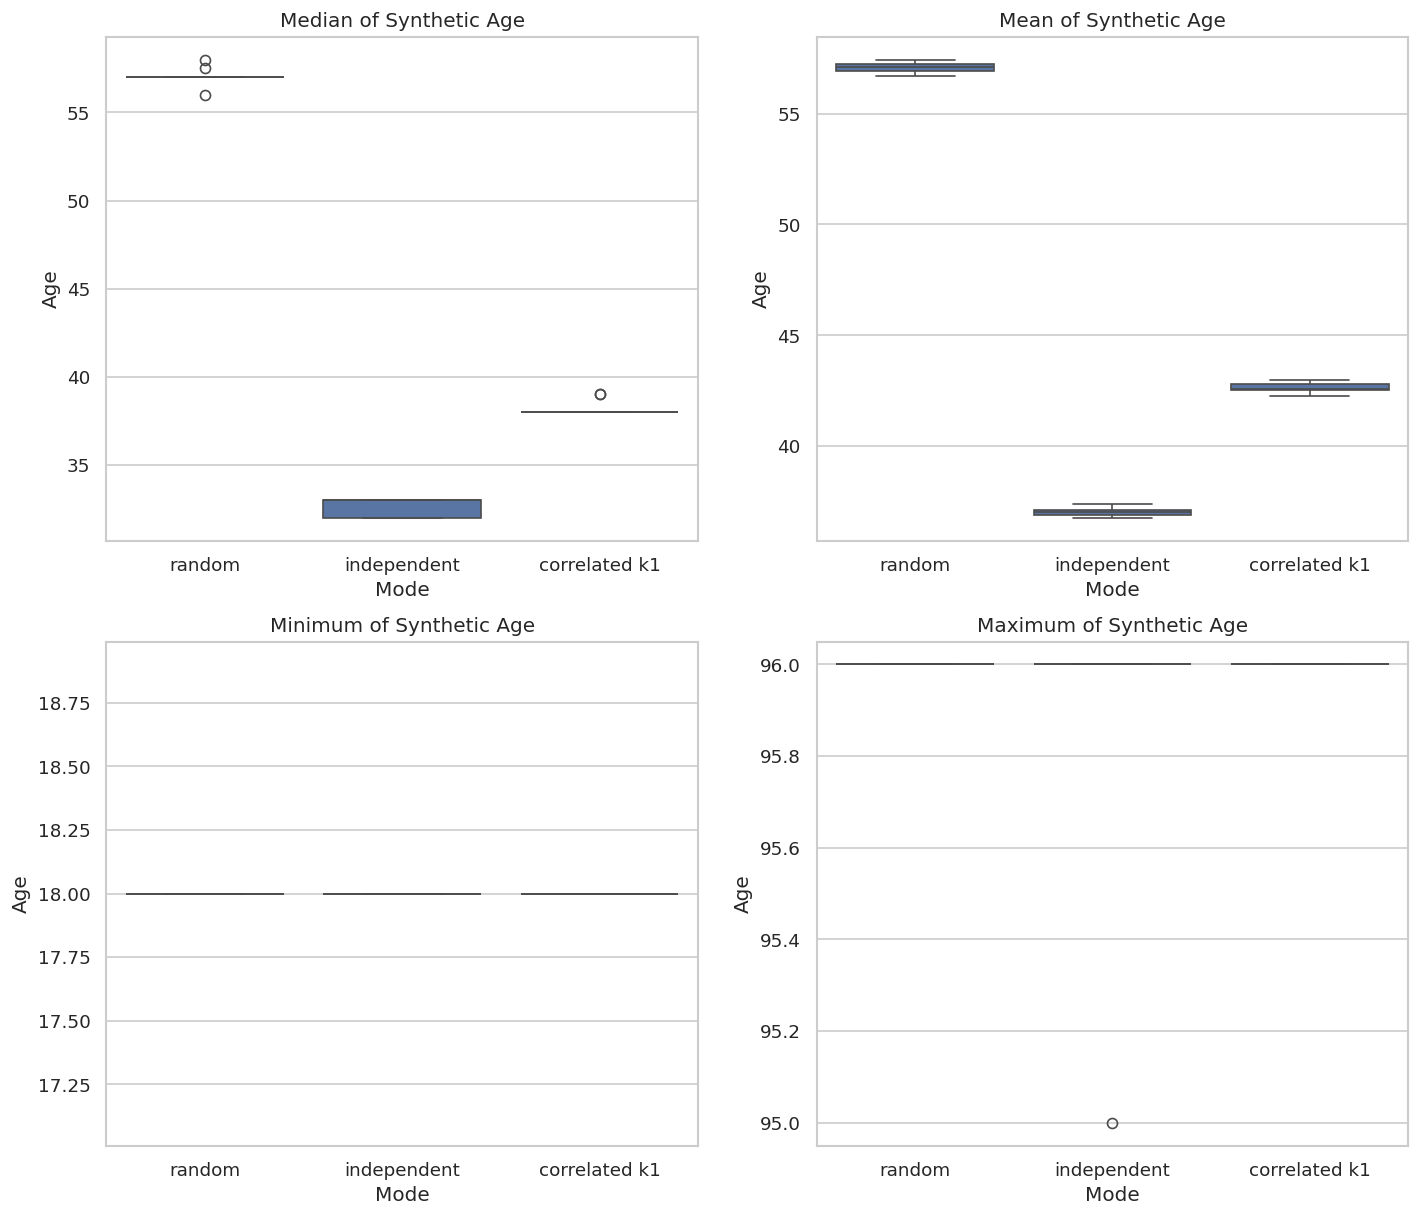

In [219]:
# boxplots of agg of age
fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=120)
sns.boxplot(x='mode', y='median', data=agg_df, ax=axes[0, 0])
axes[0,0].set_title('Median of Synthetic Age')
sns.boxplot(x='mode', y='mean', data=agg_df, ax=axes[0, 1])
axes[0,1].set_title('Mean of Synthetic Age')
sns.boxplot(x='mode', y='min',data=agg_df, ax=axes[1, 0])
axes[1,0].set_title('Minimum of Synthetic Age')
sns.boxplot(x='mode', y='max', data=agg_df, ax=axes[1, 1])
axes[1,1].set_title('Maximum of Synthetic Age')

for ax in axes.flatten():
  ax.set_xlabel('Mode')
  ax.set_ylabel('Age')

plt.show();

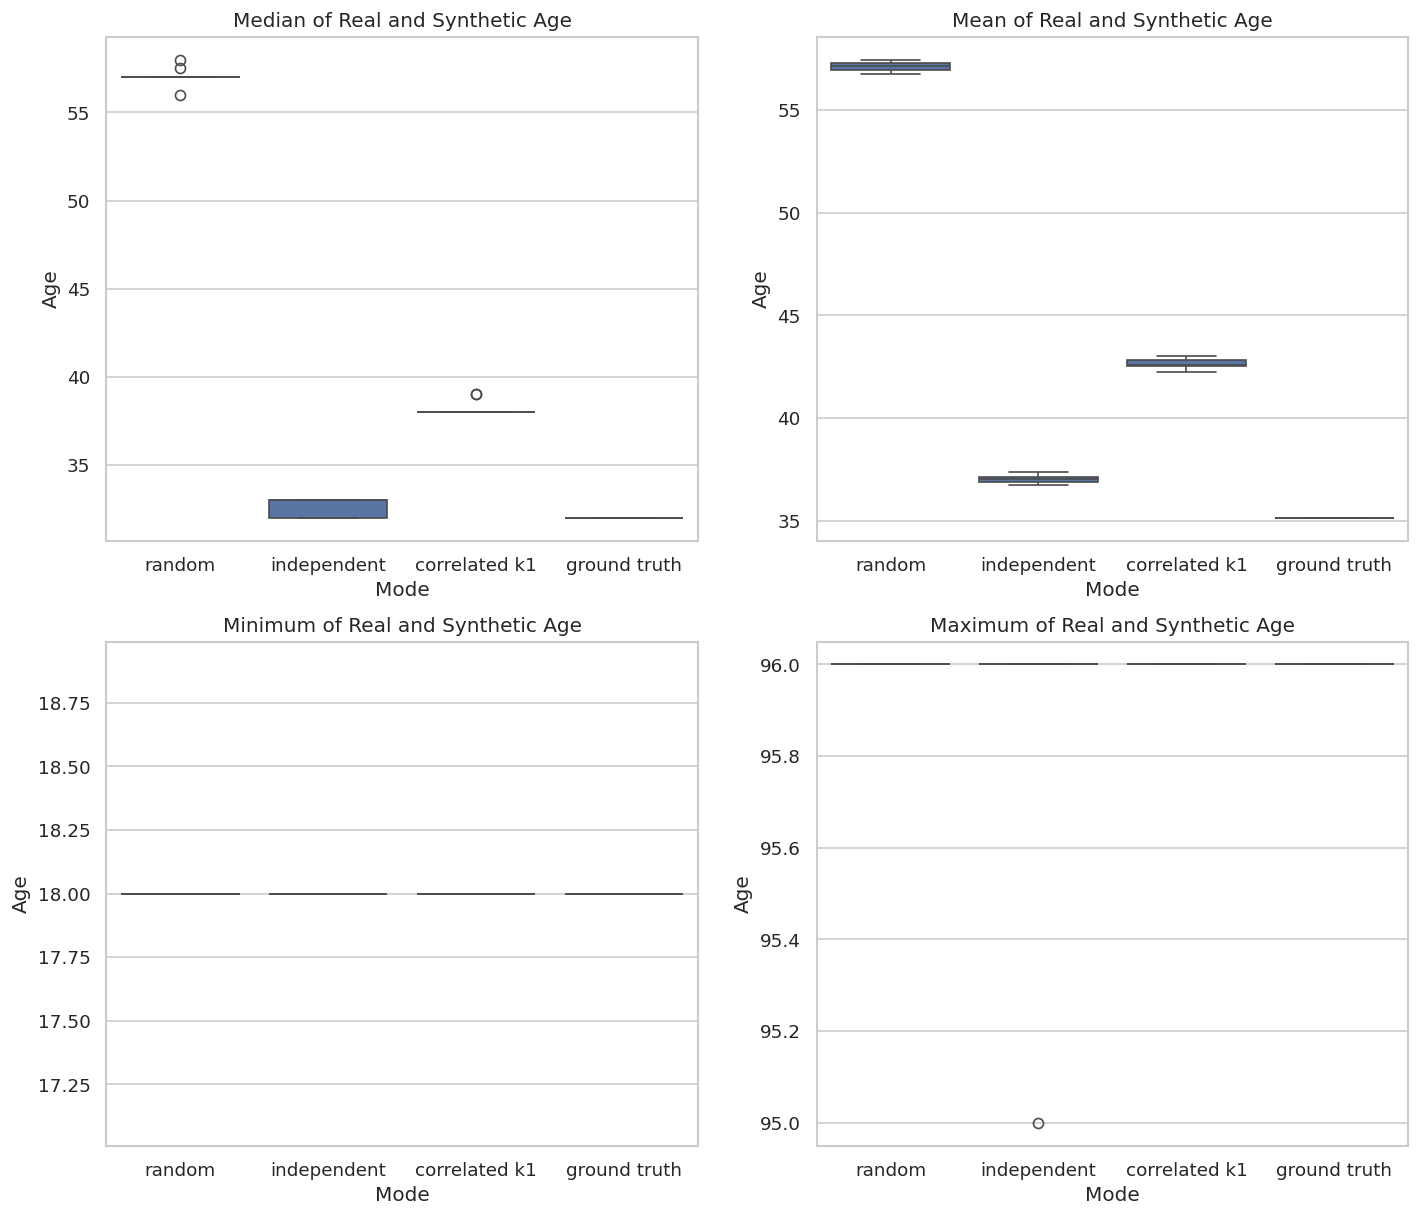

In [220]:
# comparison boxplots to the ground truth values
GT_age = np.array(df_real['age'].agg(['median', 'mean', 'min', 'max']))
GT_age_df = pd.DataFrame([GT_age], columns=['median','mean','min','max'])
GT_age_df['mode'] = 'ground truth'
GT_comparison = pd.concat([agg_df, GT_age_df], ignore_index=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=120)
sns.boxplot(x='mode', y='median', data=GT_comparison, ax=axes[0, 0])
axes[0,0].set_title('Median of Real and Synthetic Age')
sns.boxplot(x='mode', y='mean', data=GT_comparison, ax=axes[0, 1])
axes[0,1].set_title('Mean of Real and Synthetic Age')
sns.boxplot(x='mode', y='min',data=GT_comparison, ax=axes[1, 0])
axes[1,0].set_title('Minimum of Real and Synthetic Age')
sns.boxplot(x='mode', y='max', data=GT_comparison, ax=axes[1, 1])
axes[1,1].set_title('Maximum of Real and Synthetic Age')

for ax in axes.flatten():
  ax.set_xlabel('Mode')
  ax.set_ylabel('Age')

plt.show();

## Part (c)

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.01, 0.02, ..., 0.1].

In [226]:
epsilons_mst_kl = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
iters = 10

agg_B_epsilon1 = []
agg_C_epsilon1 = []
agg_D_epsilon1 = []
np.random.seed(seed)
set_random_seed(seed)

for epsilon in epsilons_mst_kl:
  for i in range(iters):

  # independent attribute [B]
    epsilon_fake_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
    B_kl = kl_test(df_real, epsilon_fake_B, 'race')
    agg_B_epsilon1.append([epsilon, B_kl])

  # correlated attribute k1 [C]
    epsilon_fake_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
    C_kl = kl_test(df_real, epsilon_fake_C, 'race')
    agg_C_epsilon1.append([epsilon, C_kl])

    # correlated attribute k2 [D]
    epsilon_fake_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)
    D_kl = kl_test(df_real, epsilon_fake_D, 'race')
    agg_D_epsilon1.append([epsilon, D_kl])
    clear_output()

In [230]:
agg_B_epsilon_df = pd.DataFrame(agg_B_epsilon1, columns=['epsilon', 'KL-divergence'])
agg_C_epsilon_df = pd.DataFrame(agg_C_epsilon1, columns=['epsilon', 'KL-divergence'])
agg_D_epsilon_df = pd.DataFrame(agg_D_epsilon1, columns=['epsilon', 'KL-divergence'])

agg_B_epsilon_df['mode'] = 'independent'
agg_C_epsilon_df['mode'] = 'correlated k1'
agg_D_epsilon_df['mode'] = 'correlated k2'

epsilon_df = pd.concat([agg_B_epsilon_df, agg_C_epsilon_df, agg_D_epsilon_df], ignore_index=True)

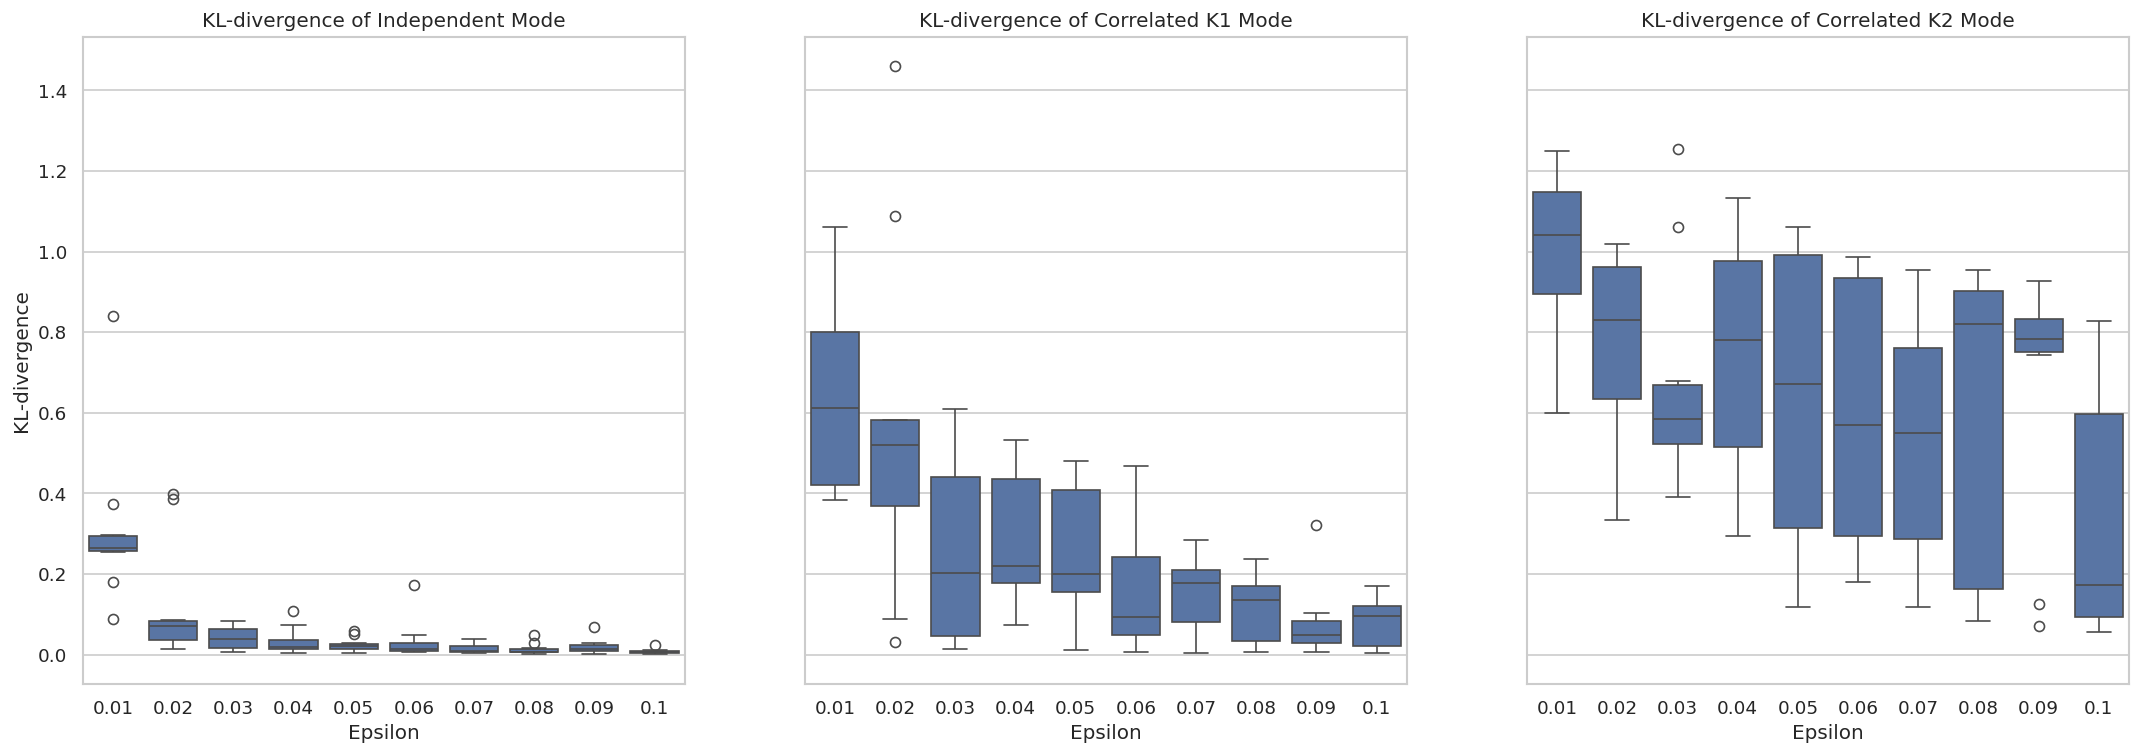

In [231]:
# epsilon box-and-whiskers plot kl-test for race
fig, axes = plt.subplots(1, 3, figsize=(22, 7), dpi=120, sharey=True)
sns.boxplot(x='epsilon', y='KL-divergence', data=agg_B_epsilon_df, ax=axes[0])
sns.boxplot(x='epsilon', y='KL-divergence', data=agg_C_epsilon_df, ax=axes[1])
sns.boxplot(x='epsilon', y='KL-divergence', data=agg_D_epsilon_df, ax=axes[2])

axes[0].set_title('KL-divergence of Independent Mode')
axes[1].set_title('KL-divergence of Correlated K1 Mode')
axes[2].set_title('KL-divergence of Correlated K2 Mode')

for ax in axes.flatten():
  ax.set_xlabel('Epsilon')
  ax.set_ylabel('KL-divergence')

plt.show();

#### Mutual Information Plot for MST
Again, replicate your plots from Part (c) for MST, this time for mutual information, on both hw_compas and hw_fake (df_real and df_fake), varying epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. Compare this plot to the plot of dataset **D** (df_real_D). Once again, you need only generate **5 datasets** per epsilon (i.e., run 5 iterations per epsilon).

In [232]:
def compute_pairwise_mi_difference(real_df, synth_df):
    """
    the sum of absolute differences in mutual information
    between all attribute pairs (i<j) from real and synthetic datasets.
    """
    columns = real_df.columns
    diff_sum = 0

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            real_mi = mutual_info_score(real_df[columns[i]].astype(str),
                                        real_df[columns[j]].astype(str))
            synth_mi = mutual_info_score(synth_df[columns[i]].astype(str),
                                         synth_df[columns[j]].astype(str))
            diff_sum += abs(real_mi - synth_mi)

    return diff_sum

In [233]:
# HW REAL
epsilons_mst_mi = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
iters = 10

agg_B_mst = []
agg_C_mst = []
agg_D_mst = []

np.random.seed(seed)
set_random_seed(seed)

for epsilon in epsilons_mst_mi:
    for i in range(iters):
        # independent attribute [B]
        df_synth_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
        B_mi_diff = compute_pairwise_mi_difference(df_real, df_synth_B)
        agg_B_mst.append([epsilon, B_mi_diff])

        # correlated attribute k=1 [C]
        df_synth_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
        C_mi_diff = compute_pairwise_mi_difference(df_real, df_synth_C)
        agg_C_mst.append([epsilon, C_mi_diff])

        # correlated attribute k=2 [D]
        df_synth_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)
        D_mi_diff = compute_pairwise_mi_difference(df_real, df_synth_D)
        agg_D_mst.append([epsilon, D_mi_diff])

        clear_output(wait=True)

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age


/usr/local/lib/python3.11/dist-packages/DataSynthesizer/lib/PrivBayes.py:193: RuntimeWarning: overflow encountered in exp
  mi_array = np.exp(mi_array)


Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute score
Adding attribute age


/usr/local/lib/python3.11/dist-packages/DataSynthesizer/lib/PrivBayes.py:193: RuntimeWarning: overflow encountered in exp
  mi_array = np.exp(mi_array)


Adding attribute sex
========================== BN constructed ==========================


In [238]:
df_mst_B = pd.DataFrame(agg_B_mst, columns=['epsilon', 'mutual information diff'])
df_mst_C = pd.DataFrame(agg_C_mst, columns=['epsilon', 'mutual information diff'])
df_mst_D = pd.DataFrame(agg_D_mst, columns=['epsilon', 'mutual information diff'])

df_mst_B['mode'] = 'independent'
df_mst_C['mode'] = 'correlated k1'
df_mst_D['mode'] = 'correlated k2'

mst_df_real = pd.concat([df_mst_B, df_mst_C, df_mst_D], ignore_index=True)
mst_df_real

,epsilon,mutual information diff,mode
0,0.0001,0.263625,independent
1,0.0001,0.263809,independent
2,0.0001,0.254314,independent
3,0.0001,0.272063,independent
4,0.0001,0.264851,independent
...,...,...,...
205,100.0000,0.020599,correlated k2
206,100.0000,0.017122,correlated k2
207,100.0000,0.008602,correlated k2
208,100.0000,0.026408,correlated k2


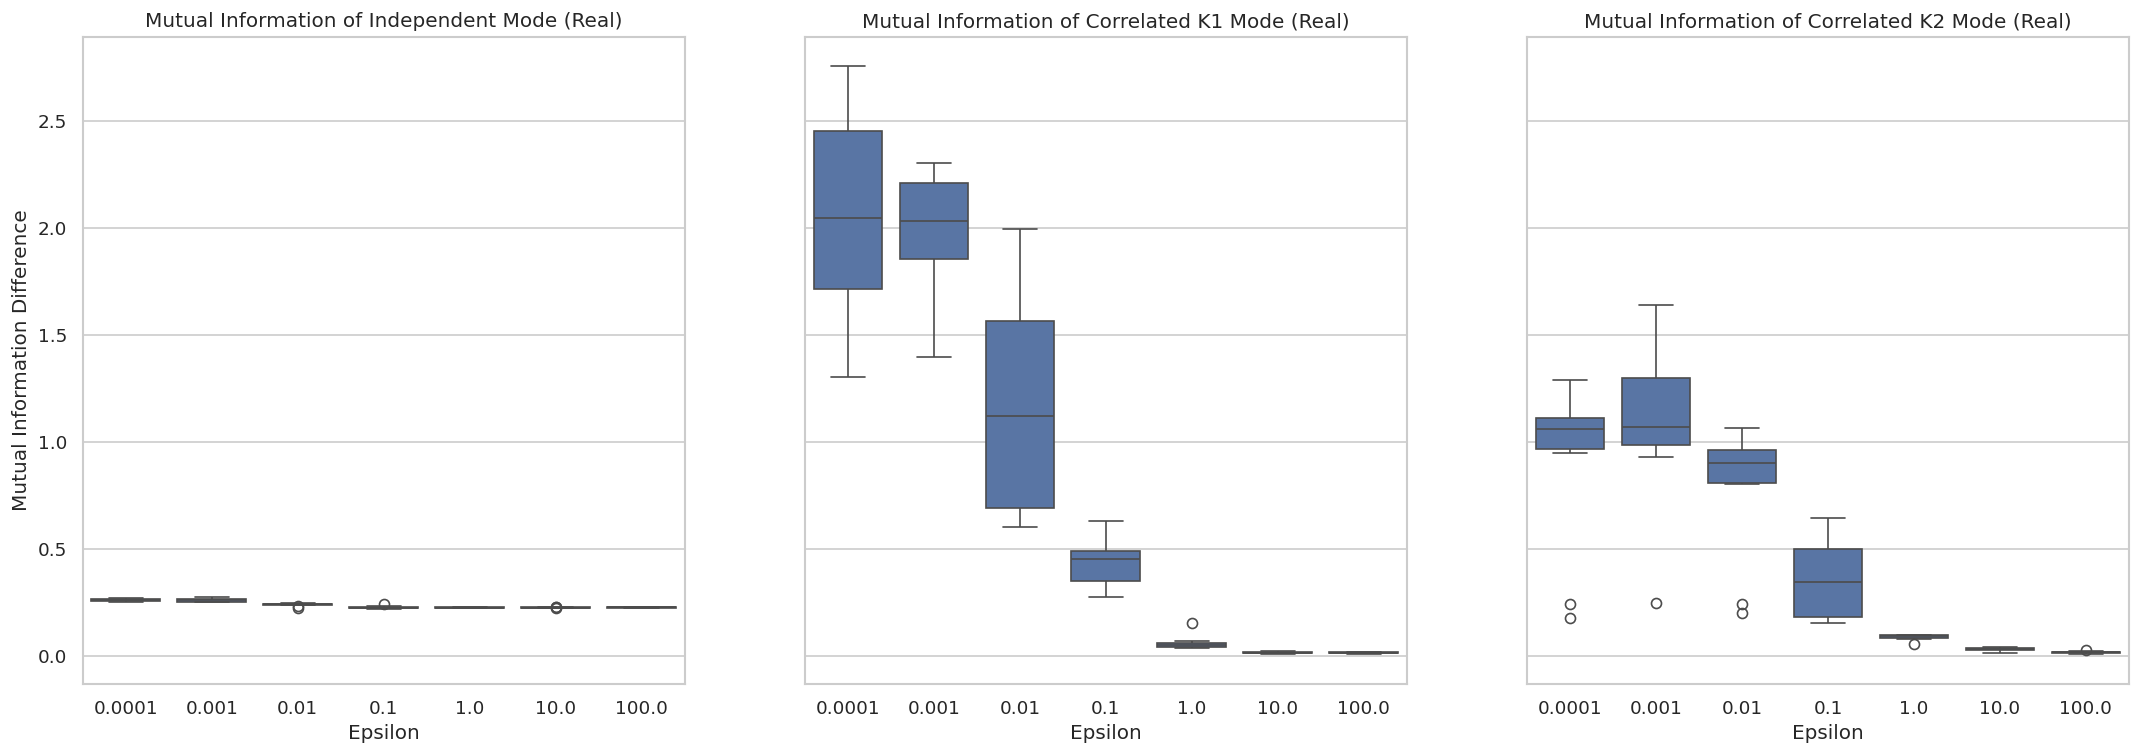

In [242]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7), dpi=120, sharey=True)
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_B, ax=axes[0])
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_C, ax=axes[1])
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_D, ax=axes[2])

axes[0].set_title('Mutual Information of Independent Mode (Real)')
axes[1].set_title('Mutual Information of Correlated K1 Mode (Real)')
axes[2].set_title('Mutual Information of Correlated K2 Mode (Real)')

for ax in axes.flatten():
  ax.set_xlabel('Epsilon')
  ax.set_ylabel('Mutual Information Difference')

plt.show();

In [239]:
# HW FAKE
epsilons_mst_mi = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
iters = 10

agg_B_mst_fake = []
agg_C_mst_fake = []
agg_D_mst_fake = []

np.random.seed(seed)
set_random_seed(seed)

for epsilon in epsilons_mst_mi:
    for i in range(iters):
        # independent attribute [B]
        df_synth_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
        B_mi_diff = compute_pairwise_mi_difference(df_fake, df_synth_B)
        agg_B_mst_fake.append([epsilon, B_mi_diff])

        # correlated attribute k=1 [C]
        df_synth_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
        C_mi_diff = compute_pairwise_mi_difference(df_fake, df_synth_C)
        agg_C_mst_fake.append([epsilon, C_mi_diff])

        # correlated attribute k=2 [D]
        df_synth_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)
        D_mi_diff = compute_pairwise_mi_difference(df_fake, df_synth_D)
        agg_D_mst_fake.append([epsilon, D_mi_diff])

        clear_output(wait=True)



================ Constructing Bayesian Network (BN) ================
Adding ROOT parent_2
Adding attribute child_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT parent_1
Adding attribute child_1
Adding attribute parent_2
Adding attribute child_2
========================== BN constructed ==========================


In [241]:
df_mst_B_fake = pd.DataFrame(agg_B_mst_fake, columns=['epsilon', 'mutual information diff'])
df_mst_C_fake = pd.DataFrame(agg_C_mst_fake, columns=['epsilon', 'mutual information diff'])
df_mst_D_fake = pd.DataFrame(agg_D_mst_fake, columns=['epsilon', 'mutual information diff'])

df_mst_B_fake['mode'] = 'independent'
df_mst_C_fake['mode'] = 'correlated k1'
df_mst_D_fake['mode'] = 'correlated k2'

mst_df_fake = pd.concat([df_mst_B_fake, df_mst_C_fake, df_mst_D_fake], ignore_index=True)
mst_df_fake

,epsilon,mutual information diff,mode
0,0.0001,1.134012,independent
1,0.0001,1.133476,independent
2,0.0001,1.133937,independent
3,0.0001,1.132843,independent
4,0.0001,1.133360,independent
...,...,...,...
205,100.0000,0.034290,correlated k2
206,100.0000,0.015090,correlated k2
207,100.0000,0.206337,correlated k2
208,100.0000,0.028364,correlated k2


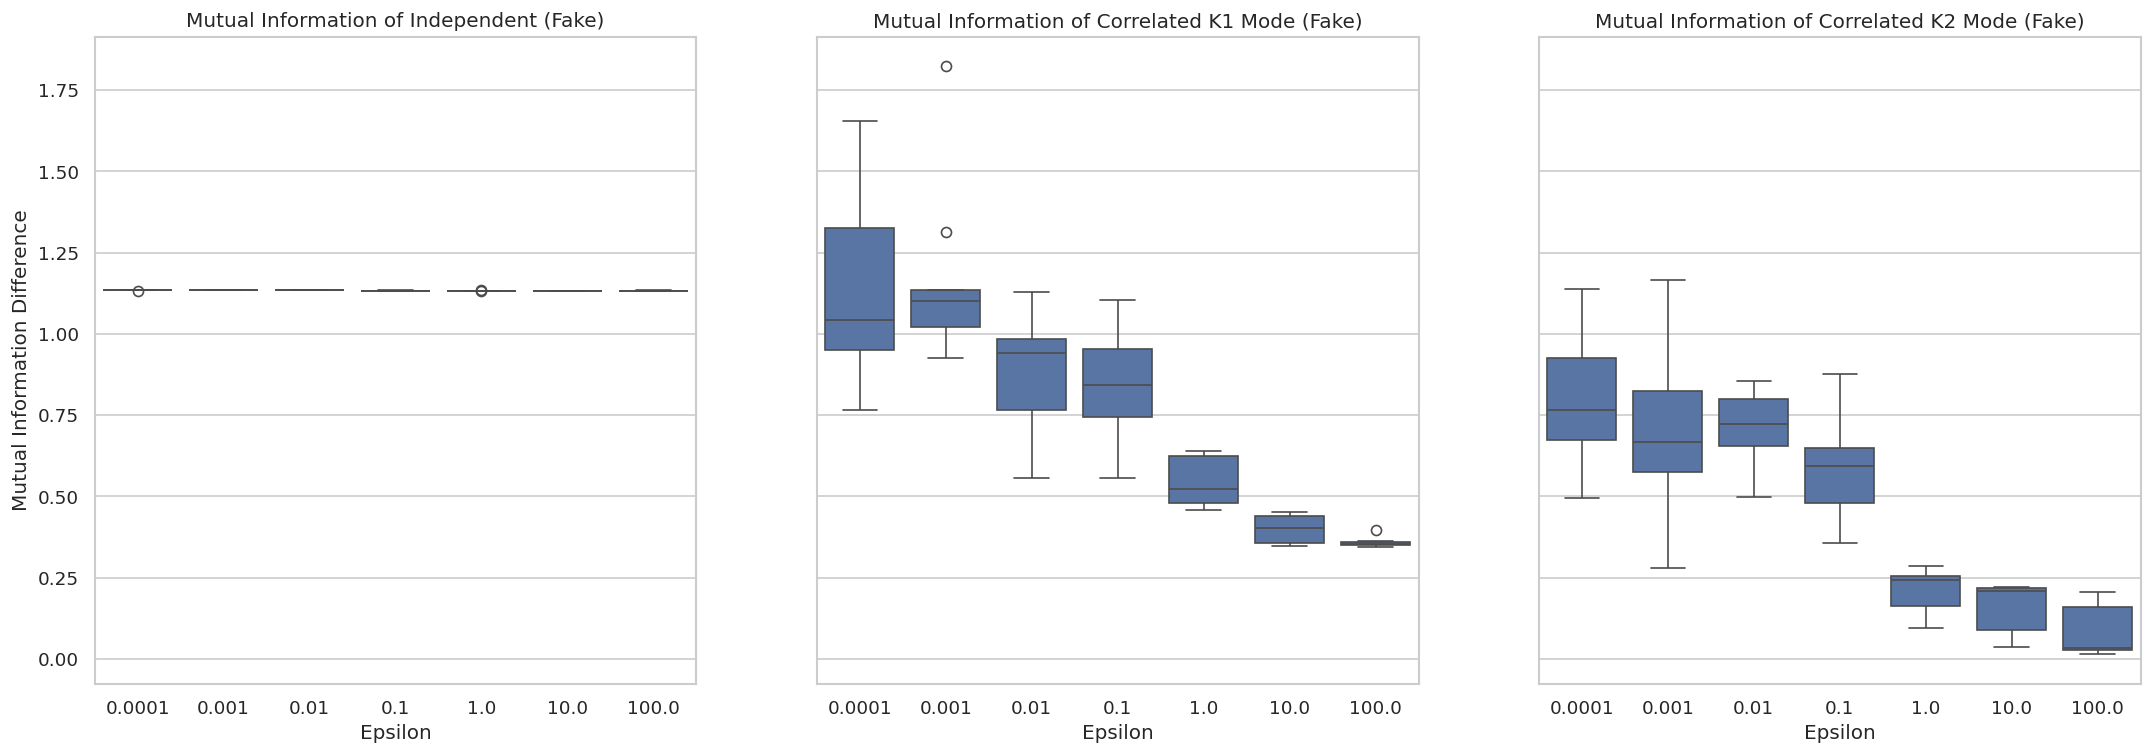

In [244]:
fig, axes = plt.subplots(1, 3, figsize=(22, 7), dpi=120, sharey=True)
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_B_fake, ax=axes[0])
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_C_fake, ax=axes[1])
sns.boxplot(x='epsilon', y='mutual information diff', data=df_mst_D_fake, ax=axes[2])

axes[0].set_title('Mutual Information of Independent (Fake)')
axes[1].set_title('Mutual Information of Correlated K1 Mode (Fake)')
axes[2].set_title('Mutual Information of Correlated K2 Mode (Fake)')

for ax in axes.flatten():
  ax.set_xlabel('Epsilon')
  ax.set_ylabel('Mutual Information Difference')

plt.show();
